<h1><center>Shaastra Biogen - Computational Epidemiology</center></h1>
<h2><center>Problem Statement 2</center></h2>
<h3><center>Anirudh Rao</center></h3>
<br>

The model will be created with Python using Jupyter Notebook as an interface. We will use <b>machine learning</b> to make our predictions.

<h3>Data Preprocessing</h3>

To create the model, we will first import some essential Python libraries for data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Now, we have to load in the data that was provided as part of the problem statement.

In [2]:
data = pd.read_csv("DataSet_Test.csv")

In [3]:
data.head()

,batch_date,test_name,swab_type,covid19_test_results,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,...,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,cxr_findings,cxr_impression,cxr_label,cxr_link,Column1
0,10/20/2020,"SARS-CoV-2, NAA",Nasal,Negative,39.0,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
1,10/20/2020,COVID-19 PCR External Result,Nasal,Negative,56.0,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
2,10/20/2020,Rapid COVID-19 PCR Test,Nasal,Negative,35.0,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
3,10/20/2020,Rapid COVID-19 PCR Test,Nasal,Negative,37.0,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN
4,10/20/2020,Rapid COVID-19 PCR Test,Nasal,Negative,42.0,False,NaN,False,False,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN


<br>
We can then check out the <b>features</b> of the data set.

In [4]:
data.columns

Index(['batch_date', 'test_name', 'swab_type', 'covid19_test_results', 'age',
       'high_risk_exposure_occupation', 'high_risk_interactions', 'diabetes',
       'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker',
       'temperature', 'pulse', 'sys', 'dia', 'rr', 'sats', 'rapid_flu_results',
       'rapid_strep_results', 'ctab', 'labored_respiration', 'rhonchi',
       'wheezes', 'days_since_symptom_onset', 'cough', 'cough_severity',
       'fever', 'sob', 'sob_severity', 'diarrhea', 'fatigue', 'headache',
       'loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore',
       'sore_throat', 'cxr_findings', 'cxr_impression', 'cxr_label',
       'cxr_link', 'Column1'],
      dtype='object')

<br>
Looking at the possible values taken by 'covid19_test_results':

In [5]:
data["covid19_test_results"].value_counts()

Negative                                                                                                                                                                                         8582
Positive                                                                                                                                                                                           81
https://braid.health/viewer/study/dd82d3b0c981f6da96d8b21e2bd7abea19731c21ec111088174974c89d95167c?key=BIo8HvL8W_dy__4IdBFd1pxP3xoibTLfRwG4ErLo9Okog3RzXmcB0VJL-7onLz9PlL4OpSzut_hzZZGPnC6LX0       1
Significant                                                                                                                                                                                         1
Name: covid19_test_results, dtype: int64

Clearly, we can see that there is a need to filter out only those instances of data where the test result is 'Positive' or 'Negative'. The meaning of the term 'Significant' is unclear.

In [6]:
data = data[data["covid19_test_results"].isin(["Positive","Negative"])]

Let us see the distribution of 'Positive' and 'Negative' cases in our dataset.

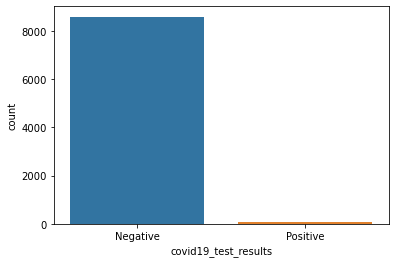

In [7]:
sns.countplot(data=data, x="covid19_test_results");

Clearly, the number of instances of 'Negative' is far greater than the number of instances of 'Positive'. Thus, this is a <b>highly imbalanced</b> dataset. The model chosen must account for this imbalance.
<br>

From the features, we have to identify the columns relevant to the two sub-parts of the problem statement.
<ul>
    <li>For Part 1, we need to select those features of the patient that are indicative of demographics and pre-existing conditions.</li>
    <li>For Part 2, we need to select those features of the patient that are indicative of COVID-19 symptoms.</li>
</ul>
We must also pay attention to the number of available (<b>non-null</b>) data points for the features while selecting them.    

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8663 entries, 0 to 8694
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   batch_date                     8663 non-null   object 
 1   test_name                      8663 non-null   object 
 2   swab_type                      8663 non-null   object 
 3   covid19_test_results           8663 non-null   object 
 4   age                            8663 non-null   float64
 5   high_risk_exposure_occupation  8610 non-null   object 
 6   high_risk_interactions         3923 non-null   object 
 7   diabetes                       8663 non-null   object 
 8   chd                            8663 non-null   object 
 9   htn                            8663 non-null   object 
 10  cancer                         8663 non-null   object 
 11  asthma                         8663 non-null   object 
 12  copd                           8663 non-null   o

<ul>
    <li>For Part 1, we can use the columns 'age', 'high_risk_exposure_occupation', 'high_risk_interactions', 'diabetes', 'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker' in order to predict 'covid19_test_results'.</li>
    <li>For Part 2, we can use the columns 'cough', 'sob', 'diarrhea', 'fatigue', 'headache', 'loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore', 'sore_throat' in order to predict 'covid19_test_results'.</li>
    </ul>

In [9]:
df1 = data[['covid19_test_results','age','high_risk_exposure_occupation','diabetes','chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker']]
df2 = data[['covid19_test_results','cough','sob','diarrhea', 'fatigue', 'headache','loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore','sore_throat']]

We now have to deal with missing values in the feature columns.

In [10]:
df1.isna().sum()

covid19_test_results              0
age                               0
high_risk_exposure_occupation    53
diabetes                          0
chd                               0
htn                               0
cancer                            0
asthma                            0
copd                              0
autoimmune_dis                    0
smoker                            0
dtype: int64

In [11]:
df2.isna().sum()

covid19_test_results     0
cough                    0
sob                     68
diarrhea                60
fatigue                 55
headache                57
loss_of_smell           61
loss_of_taste           61
runny_nose              59
muscle_sore             59
sore_throat             56
dtype: int64

From a dataset of ~8000 data points, losing less than 1% of the data is almost insignificant. So, we can drop those data points that have missing feature values.

In [12]:
df1 = df1.dropna(axis=0)
df2 = df2.dropna(axis=0)

To train our machine learning model, we must split the data into features and a label (attribute to be predicted). In this case, our label is 'covid19_test_results'.

In [13]:
X1 = df1.drop(["covid19_test_results"],axis=1)   # Features
y1 = df1["covid19_test_results"]                 # Label

In [14]:
X2 = df2.drop(["covid19_test_results"],axis=1)   # Features
y2 = df2["covid19_test_results"]                 # Label

<br>
<h3>Part 1 - Prediction based on Pre-Existing Conditions</h3>

In order to train and evaluate our model before making our predictions on the individual dataset provided, we will split the given data into a training set and a test set. We will use the scikit-learn library for machine learning purposes.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=42)

A good choice for a model would be a <b>Logistic Regression</b> model. This can be used for classifying cases as 'Positive' or 'Negative'. It also has tunable hyperparameters that can help account for the inherent imbalance in our dataset.

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model1 = LogisticRegression(class_weight="balanced", max_iter=1000)

class_weight="balanced" helps alleviate the issues posed by our imbalanced dataset. 

We can now train the model on the training data.

In [19]:
model1.fit(X1_train,y1_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

To check the perfomance of our model on the test data, we have to import a classification metric. A <b>confusion matrix</b> is normally used to do this.

In [20]:
from sklearn.metrics import plot_confusion_matrix

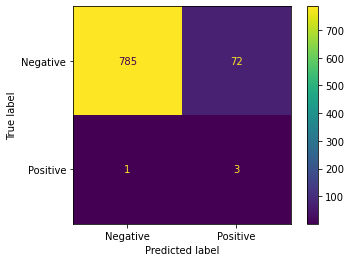

In [21]:
plot_confusion_matrix(model1,X1_test,y1_test);

<b>The main purpose of any infectious disease prediction model is to identify as many true positives as possible.</b> It is also considered important to have as few false negatives as possible, even if it comes at the cost of more false positives. False negatives are detrimental for infectious disease detection and control.

Keeping this in mind, our model is performing fairly well. It is able to identify most of the true positive cases.

Since we are happy with our model's performance, we can train it on all the available data before making a prediction on the individual dataset.

In [22]:
model1.fit(X1,y1)

LogisticRegression(class_weight='balanced', max_iter=1000)

We can now load in the individual test dataset.

In [23]:
test_data = pd.read_csv("DataSet_Participant_10.csv") 

In [24]:
additional_info = test_data[["batch_date","test_name","swab_type"]]

In [25]:
test_df1 = test_data[['age','high_risk_exposure_occupation','diabetes','chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker']]

In [26]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            51 non-null     int64
 1   high_risk_exposure_occupation  51 non-null     bool 
 2   diabetes                       51 non-null     bool 
 3   chd                            51 non-null     bool 
 4   htn                            51 non-null     bool 
 5   cancer                         51 non-null     bool 
 6   asthma                         51 non-null     bool 
 7   copd                           51 non-null     bool 
 8   autoimmune_dis                 51 non-null     bool 
 9   smoker                         51 non-null     bool 
dtypes: bool(9), int64(1)
memory usage: 995.0 bytes


We can now use our regression model to predict based on the individual dataset.

In [27]:
pred1 = model1.predict(test_df1)

In [28]:
part1_pred = pd.concat([pd.DataFrame(pred1),additional_info,test_df1],axis=1).rename(columns={0:"COVID-19 Model Prediction"})

In [29]:
part1_pred

,COVID-19 Model Prediction,batch_date,test_name,swab_type,age,high_risk_exposure_occupation,diabetes,chd,htn,cancer,asthma,copd,autoimmune_dis,smoker
0,Negative,10/20/2020,Rapid COVID-19 PCR Test,Nasal,39,False,False,False,False,False,False,False,False,False
1,Negative,10/20/2020,"SARS-CoV-2, NAA",Nasal,26,False,False,False,False,False,False,False,False,True
2,Negative,10/20/2020,Rapid COVID-19 PCR Test,Nasal,48,False,False,False,False,False,False,False,False,False
3,Negative,10/20/2020,"SARS-CoV-2, NAA",Nasal,37,False,False,False,False,False,False,False,False,False
4,Negative,10/20/2020,"SARS-CoV-2, NAA",Nasal,53,False,False,False,False,False,False,False,False,False
5,Negative,10/20/2020,"SARS-CoV-2, NAA",Nasal,27,False,False,False,False,False,False,False,False,False
6,Negative,10/20/2020,"SARS-CoV-2, NAA",Nasal,49,False,False,False,False,False,False,False,False,False
7,Negative,10/20/2020,"SARS-CoV-2, NAA",Nasal,30,False,False,False,False,False,False,False,False,False
8,Negative,10/20/2020,Rapid COVID-19 PCR Test,Nasal,59,False,False,False,False,False,False,False,False,False
9,Negative,10/20/2020,"SARS-CoV-2, NAA",Nasal,28,False,False,False,False,False,False,False,False,False


We can save our predictions for Part 1 as a csv file.

In [30]:
part1_pred.to_csv("Part 1 Predictions - Anirudh Rao.csv")

<br>
<h3>Part 2 - Prediction based on Symptoms</h3>

Similar to Part 1, we will split the data into a training and test set and then use a Logistic Regression model.

In [31]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=42)

In [32]:
model2 = LogisticRegression(class_weight="balanced",max_iter=1000)

In [33]:
model2.fit(X2_train,y2_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

We can now check the performance of our model.

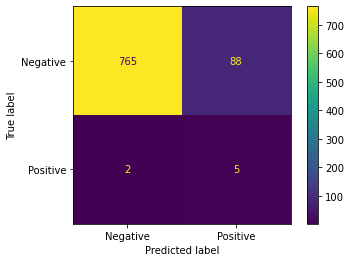

In [34]:
plot_confusion_matrix(model2,X2_test,y2_test);

Similar to our model for Part 1, this model is also performing quite well. We can clearly see that it is able to identify most of the positive cases. This is a desirable property in an infectious disease prediction model.

We can now fit the model to all the available data before making our predictions on the individual data set.

In [35]:
model2.fit(X2,y2)

LogisticRegression(class_weight='balanced', max_iter=1000)

We can now use our regression model to predict based on the individual dataset.

In [36]:
test_df2 = test_data[['cough','sob','diarrhea', 'fatigue', 'headache','loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore','sore_throat']]

In [37]:
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   cough          51 non-null     bool 
 1   sob            51 non-null     bool 
 2   diarrhea       51 non-null     bool 
 3   fatigue        51 non-null     bool 
 4   headache       51 non-null     bool 
 5   loss_of_smell  51 non-null     bool 
 6   loss_of_taste  51 non-null     bool 
 7   runny_nose     51 non-null     bool 
 8   muscle_sore    51 non-null     bool 
 9   sore_throat    51 non-null     bool 
dtypes: bool(10)
memory usage: 638.0 bytes


In [38]:
pred2 = model1.predict(test_df2)

In [39]:
part2_pred = pd.concat([pd.DataFrame(pred2),additional_info,test_df2],axis=1).rename(columns={0:"COVID-19 Model Prediction"})

In [40]:
part2_pred

,COVID-19 Model Prediction,batch_date,test_name,swab_type,cough,sob,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
0,Negative,10/20/2020,Rapid COVID-19 PCR Test,Nasal,False,False,False,False,False,False,False,False,False,False
1,Negative,10/20/2020,"SARS-CoV-2, NAA",Nasal,False,False,False,False,False,False,False,False,False,False
2,Negative,10/20/2020,Rapid COVID-19 PCR Test,Nasal,False,False,False,False,False,False,False,False,False,False
3,Negative,10/20/2020,"SARS-CoV-2, NAA",Nasal,False,False,False,False,False,False,False,False,False,False
4,Negative,10/20/2020,"SARS-CoV-2, NAA",Nasal,False,False,False,False,False,False,False,False,False,False
5,Negative,10/20/2020,"SARS-CoV-2, NAA",Nasal,False,False,False,False,False,False,False,False,False,False
6,Negative,10/20/2020,"SARS-CoV-2, NAA",Nasal,False,False,False,False,False,False,False,False,False,False
7,Negative,10/20/2020,"SARS-CoV-2, NAA",Nasal,False,False,False,False,False,False,False,False,False,False
8,Negative,10/20/2020,Rapid COVID-19 PCR Test,Nasal,False,False,False,False,False,False,False,False,False,False
9,Negative,10/20/2020,"SARS-CoV-2, NAA",Nasal,False,False,False,False,False,False,False,False,False,False


We can save our predictions for Part 2 as a csv file.

In [41]:
part2_pred.to_csv("Part 2 Predictions - Anirudh Rao.csv")

<br>
We have thus successfully built two analytical models to predict COVID-19 infection based on (i) pre-existing conditions and (ii) symptoms.
<br>
<hr>